# Convolution: Introduction and implementation

Table of Contents

* Definition and theories of convolution.
* Applications on various fields.
* Discret convolution equation.
* Implemented routine of `numpy`, `scipy`.
* 2D convolution implementation.

## Terms and definition

### Definition

Continous version

1-dim

$$(f*g)(x) := \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^\infty g(y)f(x-y) dy$$

Multi-dimension convolution: $n$-dim functions $f,g : \mathbb{F}^n \rightarrow \mathbb{F}$

$$(f*g)(x) := \frac{1}{(2 \pi)^{n/2}} \int_{-\infty}^\infty g(\mathbf{r'})f(\mathbf{r}-\mathbf{r'}) d^n r'$$

> Arfken, G. B., Weber, H.-J., &amp; Harris, F. E. (2013). Mathematical methods for physicists: A comprehensive guide. Academic. p. 986

Discrete version

1-dim

$$(f*g)[n] = \sum_{m=-\infty}^{\infty} f[m]g[n-m]$$

Multi-dimension convolution:
$$(f *^{(n)} g)(\vec{v})\\
= \sum_{t_n=-\infty}^{\infty} \sum_{t_{n-1}=-\infty}^{\infty} \cdots \sum_{t_1=-\infty}^{\infty} f(t_1, t_2, \dots, t_n) g(v_1 - t_1, v_2 - t_2, \dots, v_n - t_n)
$$

### Properties

Below properties are hold for continous and discrete cases

1. Communtivity: $f*g = g*f$
2. Associativity: $f*(g *h) = (f * g) *h$
3. Distributivity: $f*(g+h) = f*g + f*h$
4. Associativity with scalar multiplication: $(\alpha f) *g = \alpha (f*g)$
5. Linear with arbitary function $f$ on function space $\mathbf{F}$:
 
   For arbitary function $f$ on function space $\mathbf{F}$ defined on field $\mathbb{F}$, the operator $(f *)$ is linear operator on $\mathbf{F}$,

    1. $\forall g, h \in \mathbf{F}$, $(f*)(g+h) = (f*)(g) + (f*)(h)$
    2. $\forall g, \in \mathbf{F}, \alpha \in \mathbb{F}$, $(f*)(\alpha g) = \alpha(f*)(g)$

### With Fourier Transform

For Fourier transform, $\mathcal{F}: x \rightarrow t$

$$\mathcal{F}[f](t) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} f(x) e^{i tx} dx$$

#### Transform to product

Let $F = \mathcal{F}[f], G = \mathcal{F}[g]$

$$\mathcal{F}[(f*g)] = F \cdot G$$
and vice verse

$$f \cdot g = \mathcal{F}^{-1}[F * G]$$

These property is very useful for reducing calculation costs in many cases.

#### Parseval Relation

$$\int_{-\infty}^\infty f(-x) g(x) dx = \int_{-\infty}^\infty F(t) G(t) dt$$

## Applications in various Fields

### Mathematics

#### Polynomial multiplication

Product of two polynomial is a prime example of discrete convolution in their coefficients.

$$p_1(x) = \sum_{i=0}^n a_i x^i \in \mathcal{P}_n$$
$$p_2(x) = \sum_{i=0}^m b_i x^i \in \mathcal{P}_m$$

$$p_3 = p_1 \cdot p_2  = \sum_{i =1}^{n+m} c_i x^i\in \mathcal{P}_{n+m}$$


$$\mathbf{c} = (\mathbf{a} * \mathbf{b})$$

Note that, before applying form to vector convolution, dimension must be exceeded, so some elements of above vectors could be zero.


For larger dimension of polynomial multiplication, FFT can be applied to accelerate calculation. 

#### Solution of integral equation with transformations

Fedholm equation of first kind with a difference kernel $k(x,t)= k(x-t)$ and an unknown function $\phi$ is

$$f(x) = \int_{-\infty}^{\infty} k(x-t) \phi(t) dt$$ 

It is a convolution equation and with product transform on frequncy domain we can express solution $\phi(t)$ as inverse Fourier transform. Note that below equations ignore Fourier coefficients, $a, b$.

$$f(x) = (k * \phi) (x)\\
\mathcal{F}[f] = F(t) =  \mathcal{F}[k * \phi] = K(t) \cdot \Phi(t)
$$


$$\phi(x) = \mathcal{F}^{-1} \left[\frac{F}{K}\right]$$

For Fedholm equation of second kind with a difference kernel $k(x,t)= k(x-t)$ and an unknown function $\phi$ with constan $\lambda$, 

$$\phi(x) = f(x) + \lambda \int_{-\infty}^{\infty} k(x-t) \phi(t) dt$$ 

Solution with same method of above is

$$\phi(x) = \mathcal{F}^{-1} \left[\frac{F}{1- c \lambda K}\right]$$

where $c$ is a constant depending on Fourier coefficients.

However, the above method **assumes that required transformations exist**. If such transforms does not exist or violate Dirichlet condtions, we can not use.

> Arfken, G. B., Weber, H.-J., &amp; Harris, F. E. (2013). Mathematical methods for physicists: A comprehensive guide. Academic. pp. 1054-1055, 1060

### Image filtering

#### Edge handling

Edge handling in convolution is a handling edge for calculating convolution near edge of the input, because near the edge of the given data there exist kernel parts requiring outside datas of the input. In mathematical definition and signal analysis, it is not mentioned before you treat discrete calculation. Commonly, this technique is significantly treated in image processing field.

For kernel, $K$ and input $A$, where $K\in M_{5 \times 5}, A \in M_{n \times m}, n, m>5$, and $\epsilon_{ij}$ is a required value for calculating convolution outside of the input.

$$\begin{array}{c|c}
 {
    \begin{matrix}
    \epsilon_{11}, \epsilon_{12}, \epsilon_{13}\\ 
    \epsilon_{21}, \epsilon_{22}, \epsilon_{23}\\
    \epsilon_{31}, \epsilon_{32}, \epsilon_{33}
    \end{matrix}
 }&{
   \begin{matrix}
    \epsilon_{14}, \epsilon_{15}\\ 
    \epsilon_{24}, \epsilon_{25}\\
    \epsilon_{34}, \epsilon_{35}
    \end{matrix}
 } \\
 \hline
 {
   \begin{matrix}
    \epsilon_{41}, \epsilon_{42}, \epsilon_{43}\\ 
    \epsilon_{51}, \epsilon_{52}, \epsilon_{53}\\
    \end{matrix}
 }&{
   \begin{matrix}
    a_{11},  a_{12}\\ 
    a_{21},  a_{22}\\
   \end{matrix}
 }
\end{array}$$


<table align = "center" >
<th>Name</th>
<th>Example</th>
<th>Name</th>
<th>Example</th>
<tr>
  <td>Extend</td>
  <td align = "center"> 
  
  $\begin{array}{c|c}
 {
    \begin{matrix}
    a_{11}, a_{11}, a_{11}\\ 
    a_{11}, a_{11}, a_{11}\\
    a_{11}, a_{11}, a_{11}
    \end{matrix}
 }&{
   \begin{matrix}
    a_{11}, a_{12}\\ 
    a_{11}, a_{12}\\
    a_{11}, a_{12}
    \end{matrix}
 } \\
 \hline
 {
   \begin{matrix}
    a_{11}, a_{11}, a_{11}\\ 
    a_{21}, a_{21}, a_{21}\\
    \end{matrix}
 }&{
   \begin{matrix}
    a_{11},  a_{12}\\ 
    a_{21},  a_{22}\\
   \end{matrix}
 }
\end{array}$

  </td>
  <td>Wrap</td>
  <td align = "center">

  $\begin{array}{c|c}
 {
    \begin{matrix}
    a_{(n-2) (m -2)}, a_{(n-2) ( m-1)}, a_{(n-2) (m)}\\ 
    a_{(n-1) (m -2)}, a_{(n-1) ( m-1)}, a_{(n-1) (m)}\\
    a_{(n )(m -2)}, a_{  (n) ( m-1)}, a_{(n)(m)}
    \end{matrix}
 }&{
   \begin{matrix}
    a_{n-2 1}, a_{n-2 2}\\ 
    a_{n-1 1}, a_{n-1 2}\\
    a_{n 1}, a_{n2}
    \end{matrix}
 } \\
 \hline
 {
   \begin{matrix}
    a_{1 m-2}, a_{1 m-1}, a_{1m}\\ 
    a_{2 m-2}, a_{2 m-1}, a_{2m}\\
    \end{matrix}
 }&{
   \begin{matrix}
    a_{11},  a_{12}\\ 
    a_{21},  a_{22}\\
   \end{matrix}
 }
\end{array}$

  </td>
</tr>
<tr>
  <td>Reflect</td>
  <td align = "center">
  
  $\begin{array}{c|c}
 {
    \begin{matrix}
    a_{33}, a_{32}, a_{31}\\ 
    a_{23}, a_{22}, a_{21}\\
    a_{13}, a_{12}, a_{11}
    \end{matrix}
 }&{
   \begin{matrix}
    a_{31}, a_{32}\\ 
    a_{21}, a_{22}\\
    a_{11}, a_{12}
    \end{matrix}
 } \\
 \hline
 {
   \begin{matrix}
    a_{13}, a_{12}, a_{11}\\ 
    a_{23}, a_{22}, a_{12}\\
    \end{matrix}
 }&{
   \begin{matrix}
    a_{11},  a_{12}\\ 
    a_{21},  a_{22}\\
   \end{matrix}
 }
\end{array}$

  </td>
  <td>Mirror</td>
  <td align = "center">
  
  $\begin{array}{c|c}
 {
    \begin{matrix}
    a_{44}, a_{43}, a_{42}\\ 
    a_{34}, a_{33}, a_{32}\\
    a_{24}, a_{23}, a_{22}
    \end{matrix}
 }&{
   \begin{matrix}
    a_{41}, a_{42}\\ 
    a_{31}, a_{32}\\
    a_{21}, a_{22}
    \end{matrix}
 } \\
 \hline
 {
   \begin{matrix}
    a_{14}, a_{13}, a_{12}\\ 
    a_{24}, a_{23}, a_{22}\\
    \end{matrix}
 }&{
   \begin{matrix}
    a_{11},  a_{12}\\ 
    a_{21},  a_{22}\\
   \end{matrix}
 }
\end{array}$

  </td>
</tr>
<tr>
  <td>Constant: For constant </td>
  <td align = "center">
  
  $\begin{array}{c|c}
 {
    \begin{matrix}
    c, c, c\\ 
    c, c, c\\
    c, c, c
    \end{matrix}
 }&{
   \begin{matrix}
    c, c\\ 
    c, c\\
    c, c
    \end{matrix}
 } \\
 \hline
 {
   \begin{matrix}
    c, c, c\\ 
    c, c, c\\
    \end{matrix}
 }&{
   \begin{matrix}
    a_{11},  a_{12}\\ 
    a_{21},  a_{22}\\
   \end{matrix}
 }
\end{array}$

  </td>

  <td>Cropping</td>
  <td> 
    Usually, cropping input data or kernel also discussed in edge handling topic.<br> 
    However, cropping method can be combined with the above methods or the kernel <br>
    cropping can be implemented with constant method (c=0), therefore it will be treated <br>
    in further section as preprocessig option in convolution. <br>
    Kernel cropping is not different with mathematical definition of discrete convolution  </td>
</tr>

</table>


#### Cropping extend

Cropping is defining a minimum overlapping dimension between kernel and input data.
$(c_r, c_c)$ tuple indicates row and column cropping level respectively. In addition, $1 \leq c_r \leq l, 1\leq c_c \leq k$ for dimension of kernel $H \in M_{l \times k}$.
Default convolutions defined on signal and mathematics regard $(c_r, c_c) = (1, 1)$.
Next example shows overlapping of kernel and data which calculate $[1,1]$ element of convolution for $(1,1)$ and $(2, 3)$ cropping condition respectively,

$$\begin{array}{cccc|c}
  c& c& c& c& c\\
  c& c& c& c& c\\
  c& c& c& c& c\\
  c& c& c& c& c\\
  \hline
  c& c& c& c& c*a_{11}
\end{array}, 
\begin{array}{cc|ccc}
 c& c& c& c& c\\
 c& c& c& c& c\\
 c& c& c& c& c\\
 \hline
 c& c& c*a_{11}& c*a_{12}& c*a_{13}\\
 c& c& c*a_{21}& c*a_{22}& c*a_{23}\\
\end{array}$$

The outside of the input data usually omitted in many cases, $0$ element unless some edge handling method is defined.
Considering cropping coefficients $c_r, c_c$, overall dimension of convolution equation is

$$(n, m) * (l, k) = (n+l -2c_r +1, m+k -2 c_c +1) $$
$$=( (n +2l-2c_r ) -l +1, (m +2k-2c_c ) -k +1)$$
$$= ( n' -l +1, m' -k +1)$$

That is,

$$X * H, (c_r, c_c) = X' * H, (1,1)$$

$$X' := \left[
\begin{array}{c c c}
{} & R_1 &{}\\
\hline
C_1 &  X & C_2\\
\hline
{}& R_2 & {}
\end{array}\right]$$

where, $\dim(X) = (n ,m), \dim(H) = (l, k), \dim(X') = \left(n +2(l-c_r) , m +2(k-c_c)\right)$. 
The rectangle matrix $R_1 R_2, C_1, C_2$ are symmetric for each row and column filp operation and determined by edge handling method.


![Extending matrix](https://user-images.githubusercontent.com/53852890/222264263-9a55b1b7-161e-430b-a493-ebfc1ec4fc49.png)


For example, see details of next convolution with cropping $(2, 2)$ and kernel cropping: $0$ constant handling.

$$C = \left(\begin{bmatrix}
a & b & c & d\\
e & f & g & h\\
i & j & k & l
\end{bmatrix} * \begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{bmatrix}\right) \in M_{(3) \times (3)}$$

The dimension of convolution is $3 = 3+3 -2*2+1, 4 = 4+3 -2*2 +1$ and some elements are weight combination of kernel covered area of input data.

* $C_{1,1} = 5*a + 6*b+ 8*e+ 9*f$
* $C_{1,2} = 4*a + 5*b+ 6*c+ 7*e + 8*f + 9*g$
* $C_{2,1} = 2*a + 3*b+ 5*e+ 6*f + 8*i + 9*j$
* $C_{3,3} = 1*g +2*h + 4*k + 5*l$

And this is same with next convolution with $(c_r, c_c) = (l, k) = (3, 3)$

$$C = \left(\begin{bmatrix}
0& 0 & 0 & 0 & 0& 0\\
0& a & b & c & d& 0\\
0& e & f & g & h& 0\\
0& i & j & k & l& 0\\
0& 0 & 0 & 0 & 0& 0
\end{bmatrix} * \begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{bmatrix}\right) \in M_{(3) \times (3)}$$


## Discrete convolution equation

$$\mathbf{A} * \mathbf{X} = \mathbf{X} * \mathbf{A} = \mathbf{B}$$

where, $\mathbf{A} \in M_{n \times m}(\mathbf{F}), \mathbf{X} \in M_{l \times k}(\mathbb{F}), \mathbf{B} \in M_{p \times q}(\mathbb{F})$. Dimension of convolution, $\mathbf{B}$ is differ by the cropping coefficient, $c_r, c_c$. 

$$n-l +1 \leq p= (n +l - 2c_r +1) \leq n+l +1\\
m-k +1 \leq q=(m+k -2c_c +1)  \leq m+k +1$$

Common method is a DFT. Solve the equation on frequncy domain and applying inverse DFT on them.

$$DFT[\mathbf{A}] \cdot DFT[\mathbf{X}] = DFT[\mathbf{B}]\\
\mathbf{X} = IDFT[DFT[\mathbf{B}] / DFT[\mathbf{A}]]$$

Since, convolution is a linear operation we can find corresponding matrix equation of the given convoltuion.
Matrix representation system corresponding to the above convolution is,

$$\mathbf{A_c} \cdot \mathbf{X_c} = \mathbf{B_c}$$

or

$$\mathbf{X'_c} \cdot \mathbf{A'_c} = \mathbf{B'_c}$$

Moreover, the representation with matrix multiplication allows us larger freedom in choice of methods, including optimization methods. Allowing some transformation on $\mathbf{B_c}$, we can choose various matrix equation, matrix-matrix or matrix-vector forms can be presented by the transformations we choose. 
No matter the shape of system, $\mathbf{A_c}$ is always blocked Toeplitz matrix and some special case, it becomes Toeplitz square matrix. However, the transformed matrix equation has much larger dimension then convolution operation. In a view of spatial efficience and calculation time, convolution representaion will be more efficent. 
About $\mathbf{X_c}$ and $\mathbf{B_c}$, they may need reshaping functions for each transform methods. 
For example, Michal and Krystian suggested $\mathbf{B_c} = \mathbf{B}$ transform in 2-dim convolution calculation which calculation result is same with original convolution. 

> Michal Gnacij, Krystian Lapa, Using Toeplitz matrices to obtain 2D convolution, posted: October 27th, 2022, doi:https://doi.org/10.21203/rs.3.rs-2195496/v1


### Convert to matrix vector form:


![toeplitz images](https://user-images.githubusercontent.com/53852890/222264315-5d04869e-a34a-4b23-b937-e8e11dd3e899.png)
![toeplitz images2](https://user-images.githubusercontent.com/53852890/222264321-67a0990b-ebdf-4106-8416-b40236316c80.png)

Below right is a **blocked Toeplitz matrix**.


#### Method 1: $X * K \rightarrow \mathbf{K} \cdot \vec{x}$ 

For the given convolution,

$$K * X = X * K = B$$

and cropping coefficient $(c_r, c_c)$, denote that $K'$ and $X'$ are extended matrix by cropping coefficient as same method in cropping extending.

Then for $X \in M_{n_o \times m_o}$ and $K \in M_{l \times k}$

$$X' \in M_{n \times m}$$

$$n = n_o + 2(l - c_r)$$
$$m = n_o + 2(k - c_c)$$

$\mathbf{K} \in M_{(n-l+1)(m-k+1) \times nm} (\mathbb{F}), \vec{x} \in \mathbb{F}^{nm}$


$$X' = \left[\begin{array}{}
\vec{x_1} \\
\hline \vec{x_2} \\
\hline \vdots \\
\hline \vec{x_{n-1}}\\
\hline \vec{x_{n}}
\end{array}\right], \vec{x} = \left[\begin{array}{}
\vec{x_1}^t \\
\hline \vec{x_2}^t \\
\hline \vdots \\
\hline \vec{x_{n-1}}^t\\
\hline \vec{x_{n}}^t
\end{array} \right]$$

$$ \vec{x_i} = [ x_{i1}, x_{i2}, \dots, x_{i (m-1) }, x_{i m}]$$

$$\mathbf{K} = \left[ \begin{array}{c|c|c|c|c|c|c}
K_{11}     & K_{12} & \cdots & K_{1,n_{ext}} & 0 &\cdots&{0} \\
\hline
\mathbf{0} & K_{11} & \cdots & K_{1,n_{ext}-1}& K_{1,n_{ext}} & \cdots&{0}\\
\hline
\vdots & \vdots& \ddots & \ddots & \vdots&{\ddots}&\vdots\\
\hline
\mathbf{0} & \mathbf{0} & \cdots &  K_{11}& K_{12}& \cdots &K_{1,n_{ext}}
\end{array}\right]$$

$$(K_{1i})[p, q] = \begin{cases} 
 k_{i, q-p +1} &  k_{i, q-p +1} \in K' \\
 0 & q-p <0 | q-p\geq k
\end{cases} $$

$K_{1i} \in M_{(m-k+1) \times m}$ thus, $\mathbf{K} \in M_{((n-l+1)(m-k+1))\times(nm)}$

For example, $K_{1i}$ is

$$\begin{bmatrix}
k_{i1} & k_{i2} & k_{i3}&\cdots & k_{ij}   & 0         & \cdots & 0 &\cdots & 0\\
0      & k_{i1} & k_{i2}&\cdots & k_{ij-1} & k_{ij}    & \cdots & 0 &\cdots & 0\\
0      & 0      & k_{i1}&\cdots & k_{ij-2} & k_{ij-1}  & \cdots & 0 &\cdots & 0\\
\vdots & \vdots & \vdots& \ddots& \vdots   & \vdots    & \ddots & {}&\vdots & {}\\
0      & 0      & 0     & \cdots& k_{i1}   & k_{i2}    & \cdots & {k_{ij-1}}& \cdots &0 \\
0      & 0      & 0     & \cdots& 0        & k_{i1}    & \cdots & {k_{ij-2}}& \cdots &0 \\
\vdots & \vdots & \vdots& \ddots& \vdots   & \vdots    & \ddots & {} & {\vdots} & {} \\
0      & 0      & 0     & \cdots& 0        & 0         & \cdots & k_{i1} &\cdots & k_{ij}
\end{bmatrix}$$


#### Condition for square matrix

<table style="border-radius:8px;width:100%;">
<th style="text-align:center;background-color:rgb(0, 0, 0); color:white; border-top-left-radius: 10px;width:20%;">
Thm</th>
<th style="text-align:left;">
Square condition of transformed matrix of convolution </th>
<tr style="text-align:center;">
<td colspan="2">

For given convolution,

$$ X * K$$

where $X \in M_{n\times m},  K \in M_{l \times k}$ with cropping coefficient $(c_r, c_c)$,

corresponding matrix equation with the above tranformation, 

$$\mathbf{K} \cdot \vec{\mathbf{x}}.$$ 

If $l = 2 c_r -1$ and $k = 2 c_c -1$ and cropping, the system is a square system of which $\mathbf{K} \in M_{nm \times nm}$

</td>
</tr>

</table>

**Proof**

Start from extend matrix, $X_{ext}$ by the kernel and cropping dimensions,

Note: It is a roundabout way but very convinence in flow.

$$X' := \left[
\begin{array}{c c c}
{} & R_1 &{}\\
\hline
C_1 &  X & C_2\\
\hline
{}& R_2 & {}
\end{array}\right]$$


$$X'\in M_{n\times m}$$
$$= n_o + 2 e_r, m = m_o + 2 e_c$$

where, $e_r = l- c_r, e_c = k -c_c$.

The corresponding matrix system is 

$$\mathbf{K} \in M_{a\times b}$$
$$a = (n-l+1)(m-k+1)$$
$$b = n m$$

First with kernel cropping, the additional $e_r = e_c =0$, thus $n = n_o , m = m_o$.

and if we extend $a$ with $n, m, l, k, c_r, c_c$ then,

$$a = n_o m_o $$
$$ + \left( (n_o+m_o) + (n_o k + m_o l) - lk +1 \right)$$
$$ - \left( 2(n_o c_c + m_o cr) -(l c_c + k c_r) + (c_r + c_c)\right)$$

$$\because l = 2c_r -1, k = 2c_c -1 $$

3-rd therm of RHS becomes

$$- \left((n_o+m_o) + (n_o k + m_o l) - lk +1 \right)$$

$$ \therefore a = n_o m_o, a=b$$

---

 
By the definition of transform, the block banded matrix $\mathbf{K}$ of form,

$$\mathbf{K} = \left[ \begin{array}{c|c|c|c|c|c|c}
K_{11}     & K_{12} & \cdots & K_{1,n_{ext}} & 0 &\cdots&{0} \\
\hline
\mathbf{0} & K_{11} & \cdots & K_{1,n_{ext}-1}& K_{1,n_{ext}} & \cdots&{0}\\
\hline
\vdots & \vdots& \ddots & \ddots & \vdots&{\ddots}&\vdots\\
\hline
\mathbf{0} & \mathbf{0} & \cdots &  K_{11}& K_{12}& \cdots &K_{1,n_{ext}}
\end{array}\right]$$

is reduced to 

$$\mathbf{K} = \left[ 
  \begin{array}{c|c|c|c}
   K_{c_r} & K_{c_r +1} & \cdots & K_{l}\\
   \hline
   K_{c_r -1} & K_{c_r} & \cdots & K_{l-1}\\
   \hline
   \vdots & \vdots & \ddots & \vdots\\
   \hline
   K_1 & K_2 & \cdots  & K_{c_r}
  \end{array}
\right]$$


where, $K_{i} \in M_{m \times m}$, $c_r =n, l = 2n-1$

See a graphical example.

![Square_matrix_1](https://user-images.githubusercontent.com/53852890/222264300-108c9a2d-6787-48d4-a54a-d82473a571e8.png)
![Square_matrix_2](https://user-images.githubusercontent.com/53852890/222264306-172e3e3d-6000-4ec0-a745-dd48c35b8696.png)

## Implementations of Discrete convolution

### Basic libraries

* `numpy.convolve` : 1dim
* `scipy`
  * `signal`
    * `convolve` : 1 dim
    * `convolve2d` : 2 dim
  * `ndimage`
    * `convolve` : 2 dim

### Extending

`numpy` 1-dim to 2-dim convolution.

Below code uses extending matrix in calculation and cropping in process, so there is lot of inefficient in spatial and calcaultion speed. About 4~7 times larger than `scipy` routine. 
However, it does not use `fft` routine.

Note that, when you compare your custom convolution filtering to `ndimage` filter, you must beaware the data type of pixel data most of image data stored as `uint8` type. This type cause over flow in `matplotlib` image show. So, set `ouput=float` or other data type to show result of `ndimage`.

![2d_decompose](https://user-images.githubusercontent.com/53852890/222264205-62407a6e-5871-4595-a001-bf8fc365095e.png)

In [1]:
import numpy as np
import convolution

#### Test routine

In [2]:
X = (np.arange(12)+1).reshape(3, 4)
l, k = (2, 3) #kernerl_dim
cr, cc = (1,1)
er, ec = l-cr, k-cc

In [3]:
X

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [4]:
edge_mode = "extend"
edge_params= [0]
convolution._expand_matrix(X, (er, ec), [edge_mode]+edge_params)

array([[ 1,  1,  1,  2,  3,  4,  4,  4],
       [ 1,  1,  1,  2,  3,  4,  4,  4],
       [ 5,  5,  5,  6,  7,  8,  8,  8],
       [ 9,  9,  9, 10, 11, 12, 12, 12],
       [ 9,  9,  9, 10, 11, 12, 12, 12]])

In [5]:
edge_mode = "wrap"
edge_params= [0]
convolution._expand_matrix(X, (er, ec), [edge_mode]+edge_params)

array([[11, 12,  9, 10, 11, 12,  9, 10],
       [ 3,  4,  1,  2,  3,  4,  1,  2],
       [ 7,  8,  5,  6,  7,  8,  5,  6],
       [11, 12,  9, 10, 11, 12,  9, 10],
       [ 3,  4,  1,  2,  3,  4,  1,  2]])

In [6]:
edge_mode = "mirror"
edge_params= [0]
convolution._expand_matrix(X, (er, ec), [edge_mode]+edge_params)

array([[ 7,  6,  5,  6,  7,  8,  7,  6],
       [ 3,  2,  1,  2,  3,  4,  3,  2],
       [ 7,  6,  5,  6,  7,  8,  7,  6],
       [11, 10,  9, 10, 11, 12, 11, 10],
       [ 7,  6,  5,  6,  7,  8,  7,  6]])

In [7]:
edge_mode = "reflect"
edge_params= [0]
convolution._expand_matrix(X, (er, ec), [edge_mode]+edge_params)

array([[ 2,  1,  1,  2,  3,  4,  4,  3],
       [ 2,  1,  1,  2,  3,  4,  4,  3],
       [ 6,  5,  5,  6,  7,  8,  8,  7],
       [10,  9,  9, 10, 11, 12, 12, 11],
       [10,  9,  9, 10, 11, 12, 12, 11]])

In [8]:
edge_mode = "constant"
edge_params= [0.5]
convolution._expand_matrix(X, (er, ec), [edge_mode]+edge_params)

array([[ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5],
       [ 0.5,  0.5,  1. ,  2. ,  3. ,  4. ,  0.5,  0.5],
       [ 0.5,  0.5,  5. ,  6. ,  7. ,  8. ,  0.5,  0.5],
       [ 0.5,  0.5,  9. , 10. , 11. , 12. ,  0.5,  0.5],
       [ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5]])

$$[1, 0, 0, 1, 0, 1, 0, 1] * [1, 0, 0, 1, 0, 1, 0, 1]^t$$
$$= \begin{bmatrix}
1 & 0 & 0 & 1 & 0 & 1 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 1 & 0 & 1 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\
1 & 0 & 0 & 1 & 0 & 1 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\
1 & 0 & 0 & 1 & 0 & 1 & 0 & 1 \\
\end{bmatrix}$$

In [9]:
x1  = np.array([[1, 0, 0, 1, 0, 1, 0, 1]])
convolution.convolve2d(x1, x1.transpose())

array([[1., 0., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 1.]])

$$K * X$$

In [10]:
K = np.array(
    [[2, 0, 0, 3, 0],
     [2, 4, 4, 4, 0],
     [2, 4,  8, 4, 0],
     [2, 4, -1, 4, 0],
     [2, 0, 0, 0, 0]])
X = (np.arange(12)+1).reshape(3, 4)

Commute

In [35]:
(convolution.convolve2d(X, K) - convolution.convolve2d(K, X)).sum()

0.0

Compare to scipy routine

* `signal.convovle2d`:
* `ndimage.convovle` : It makes the output dimension to be same with the input(image data) dimension, (input, kernel). Thus, this routine is not commute unlike normal convolution implementations in other libraries. 

In [13]:
from scipy.signal import convolve2d as convolve_sig
from scipy.ndimage import convolve as convolve_image

`signal.convovle2d` -> `convolve_sig`

In [14]:
convolve_sig(X, K)

array([[  2,   4,   6,  11,   6,   9,  12,   0],
       [ 12,  20,  32,  63,  54,  49,  40,   0],
       [ 30,  60, 102, 179, 162, 137,  84,   0],
       [ 30,  96, 189, 278, 265, 192,  96,   0],
       [ 30,  92, 173, 250, 225, 160,  80,   0],
       [ 28,  68,  67, 110,  77,  32,  48,   0],
       [ 18,  20,  22,  24,   0,   0,   0,   0]])

In [15]:
convolution.convolve2d(K, X)

array([[  2.,   4.,   6.,  11.,   6.,   9.,  12.,   0.],
       [ 12.,  20.,  32.,  63.,  54.,  49.,  40.,   0.],
       [ 30.,  60., 102., 179., 162., 137.,  84.,   0.],
       [ 30.,  96., 189., 278., 265., 192.,  96.,   0.],
       [ 30.,  92., 173., 250., 225., 160.,  80.,   0.],
       [ 28.,  68.,  67., 110.,  77.,  32.,  48.,   0.],
       [ 18.,  20.,  22.,  24.,   0.,   0.,   0.,   0.]])

In [16]:
convolve_sig(X, K, mode="valid")

array([[179, 162],
       [278, 265],
       [250, 225]])

In [17]:
convolution.convolve2d(K, X, crop=(X.shape))

array([[179., 162.],
       [278., 265.],
       [250., 225.]])

In [18]:
convolve_sig(X, K, mode="same")

array([[102, 179, 162, 137],
       [189, 278, 265, 192],
       [173, 250, 225, 160]])

In [19]:
convolution.convolve2d(X, K, image_mode=True)

array([[102., 179., 162., 137.],
       [189., 278., 265., 192.],
       [173., 250., 225., 160.]])

`ndimage.convolve` -> `convolve_image`

Edge handling

In [20]:
convolve_image(X, K, mode="constant", cval=0)

array([[102, 179, 162, 137],
       [189, 278, 265, 192],
       [173, 250, 225, 160]])

In [21]:
convolution.convolve2d(X, K, edge_mode = "constant", image_mode=True)

array([[102., 179., 162., 137.],
       [189., 278., 265., 192.],
       [173., 250., 225., 160.]])

In [22]:
print(convolve_image( X, K, mode="reflect"))
print(convolution.convolve2d( X, K, image_mode=True, edge_mode="reflect"))


[[184 217 255 271]
 [304 337 375 391]
 [392 425 463 479]]
[[184. 217. 255. 271.]
 [304. 337. 375. 391.]
 [392. 425. 463. 479.]]


In [23]:
print(convolve_image( X, K, mode="constant", cval=0))
print(convolution.convolve2d( X, K, image_mode=True, edge_mode="constant", edge_params=[0]))


[[102 179 162 137]
 [189 278 265 192]
 [173 250 225 160]]
[[102. 179. 162. 137.]
 [189. 278. 265. 192.]
 [173. 250. 225. 160.]]


In [24]:
print(convolve_image( X, K, mode="nearest"))
print(convolution.convolve2d( X, K, image_mode=True, edge_mode="extend"))


[[176 209 247 273]
 [304 337 375 401]
 [412 445 483 509]]
[[176. 209. 247. 273.]
 [304. 337. 375. 401.]
 [412. 445. 483. 509.]]


In [25]:
print(convolve_image( X, K, mode="mirror"))
print(convolution.convolve2d( X, K, image_mode=True, edge_mode="mirror"))


[[243 261 289 293]
 [307 325 353 357]
 [331 349 377 381]]
[[243. 261. 289. 293.]
 [307. 325. 353. 357.]
 [331. 349. 377. 381.]]


In [26]:
print(convolve_image( X, K, mode="wrap"))
print(convolution.convolve2d( X, K, image_mode=True, edge_mode="wrap"))

[[301 289 297 297]
 [325 313 321 321]
 [325 313 321 321]]
[[301. 289. 297. 297.]
 [325. 313. 321. 321.]
 [325. 313. 321. 321.]]


Filtering

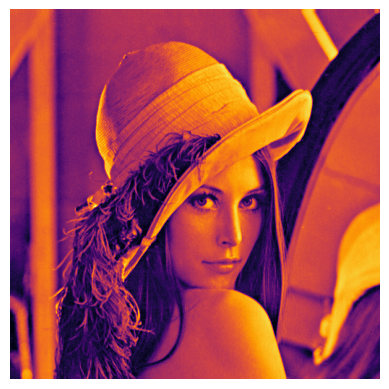

In [27]:
import PIL.Image as pilimg
import matplotlib.pyplot as plt
from scipy import ndimage

im = pilimg.open("Lenna.png").convert('L')
pix = np.array(im)
plt.axis('off')
plt.imshow(pix, cmap="inferno")
plt.show()

In [28]:
filters ={
    "edge": np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]]),
    "sobel": np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]]),
    "sharpen": np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]]),
    "blur": np.array([[1, 1, 1],[1, 1, 1],[1, 1, 1]])/9,
    "identity": np.array([[0, 0, 0],[0, 1, 0],[0, 0, 0]])
}

In [29]:
filter = filters["sobel"]

titles= [["Original", "Edge X-ndimage", "Edge Y-ndimage"], 
         ["Edge XY-custom", "Edge X-custom", "Edge Y-custom"]]

pix_t_n_m = ndimage.convolve(pix, filter, output=float, mode="constant", cval=0)
pix_t_n_f = ndimage.sobel(pix, output=float)
pix_t_c_x = convolution.convolve2d(pix, filter, image_mode=True)
pix_t_c_y = convolution.convolve2d(pix, filter.transpose(), image_mode=True)

images = [
    [pix, pix_t_n_m, pix_t_n_f],
    [(pix_t_c_x+pix_t_c_y)/2, pix_t_c_x, pix_t_c_y]
]

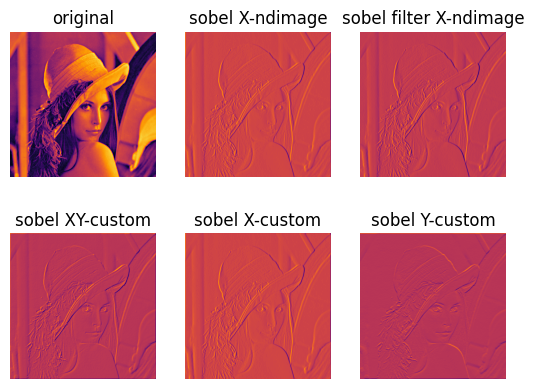

In [30]:
fig, axes = plt.subplots(2, 3)
titles= [["original", "sobel X-ndimage", "sobel filter X-ndimage"], 
         ["sobel XY-custom", "sobel X-custom", "sobel Y-custom"]]

for i, row in enumerate(axes):
    for j, ax_c in enumerate(row):
        ax_c.axis('off')
        ax_c.set_title(titles[i][j])
        ax_c.imshow(images[i][j], cmap="inferno")
plt.show()


Convert to toepltiz matrix system

In [31]:
K_m, X_v = convolution.convolve2toeplitz(X, K)
X_m, K_v = convolution.convolve2toeplitz(K, X)

In [40]:
print("=Case 1========")
print("Matrix:", K_m.shape)
print("Vec:", X_v.shape)
print("=Case 1========")
print("Matrix:", X_m.shape)
print("Vec:", K_v.shape)

=Case 1========
Matrix: (56, 12)
Vec: (12,)
=Case 1========
Matrix: (56, 25)
Vec: (25,)


In [32]:
convolution.convolve2d(X, K)

array([[  2.,   4.,   6.,  11.,   6.,   9.,  12.,   0.],
       [ 12.,  20.,  32.,  63.,  54.,  49.,  40.,   0.],
       [ 30.,  60., 102., 179., 162., 137.,  84.,   0.],
       [ 30.,  96., 189., 278., 265., 192.,  96.,   0.],
       [ 30.,  92., 173., 250., 225., 160.,  80.,   0.],
       [ 28.,  68.,  67., 110.,  77.,  32.,  48.,   0.],
       [ 18.,  20.,  22.,  24.,   0.,   0.,   0.,   0.]])

In [33]:
K_m.dot(X_v).reshape(7,8)

array([[  2.,   4.,   6.,  11.,   6.,   9.,  12.,   0.],
       [ 12.,  20.,  32.,  63.,  54.,  49.,  40.,   0.],
       [ 30.,  60., 102., 179., 162., 137.,  84.,   0.],
       [ 30.,  96., 189., 278., 265., 192.,  96.,   0.],
       [ 30.,  92., 173., 250., 225., 160.,  80.,   0.],
       [ 28.,  68.,  67., 110.,  77.,  32.,  48.,   0.],
       [ 18.,  20.,  22.,  24.,   0.,   0.,   0.,   0.]])

In [39]:
X_m.dot(K_v).reshape(7,8)

array([[  2.,   4.,   6.,  11.,   6.,   9.,  12.,   0.],
       [ 12.,  20.,  32.,  63.,  54.,  49.,  40.,   0.],
       [ 30.,  60., 102., 179., 162., 137.,  84.,   0.],
       [ 30.,  96., 189., 278., 265., 192.,  96.,   0.],
       [ 30.,  92., 173., 250., 225., 160.,  80.,   0.],
       [ 28.,  68.,  67., 110.,  77.,  32.,  48.,   0.],
       [ 18.,  20.,  22.,  24.,   0.,   0.,   0.,   0.]])

In [41]:
%%timeit
K_m.dot(X_v).reshape(7,8)

2.72 µs ± 61.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [42]:
%%timeit
X_m.dot(K_v).reshape(7,8)

2.86 µs ± 38.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [43]:
def cal_toeplitz(X, K):
    K_m, X_v = convolution.convolve2toeplitz(X, K)
    dim = convolution.get_dim_convole(X.shape, K.shape, (1,1))
    return K_m.dot(X_v).reshape(dim)

In [45]:
%%timeit
convolution.convolve2d(X, K)

287 µs ± 2.87 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [46]:
%%timeit
cal_toeplitz(X, K)

912 µs ± 5.95 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [49]:
%%timeit
convolution.convolve2toeplitz(X, K)

902 µs ± 14.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [47]:
%%timeit
K_m.dot(X_v).reshape(7,8)

2.72 µs ± 70.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [48]:
%%timeit
convolve_image(X, K, mode="constant", cval=0)

18.2 µs ± 198 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
